### Plant Seedlings Classification

In [0]:
import warnings
warnings.filterwarnings("ignore") 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
from glob import glob
import pandas as pd 
import matplotlib.pyplot as plt

In [0]:
import os

GPATH="/content/drive/My Drive/GLLAB/PlanetSeeding"
os.environ['GPATH'] = GPATH

DATA_PATH = "/content/dataset_ps"
os.environ['DATA_PATH'] = DATA_PATH


RAW_DATA = "/content/raw-data"
os.environ['RAW_DATA'] = RAW_DATA

TRAIN_PATH = "/content/dataset_ps/train"
os.environ['DATA_PATH'] = TRAIN_PATH

In [0]:

%%time
%%bash

rm -rf $RAW_DATA
mkdir -p $RAW_DATA


rm -rf $DATA_PATH
mkdir -p $DATA_PATH


CPU times: user 4.41 ms, sys: 3.1 ms, total: 7.51 ms
Wall time: 44.3 ms


In [0]:
#Copy train dataset from gdrive

!cp "/content/drive/My Drive/GLLAB/PlanetSeeding/train.zip" /content/raw-data
!7z x /content//raw-data/train.zip -o"$DATA_PATH"


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content//raw-data/                             1 file, 1718530069 bytes (1639 MiB)

Extracting archive: /content//raw-data/train.zip
 85% 4096 Open              --
Path = /content//raw-data/train.zip
Type = zip
Physical Size = 1718530069

  0%      1% 93 - train/Fat Hen/997fc29b0.png                                       2% 169 - train/Fat Hen/2160ec61c.png                                        3% 256 - train/Fat Hen/0f335c7a7.png                                      

In [0]:
#Copy test dataset from gdrive

!cp "/content/drive/My Drive/GLLAB/PlanetSeeding/test.zip" /content/raw-data
!7z x /content//raw-data/test.zip -o"$DATA_PATH"


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content//raw-data/                             1 file, 90141460 bytes (86 MiB)

Extracting archive: /content//raw-data/test.zip
--
Path = /content//raw-data/test.zip
Type = zip
Physical Size = 90141460

  0%     19% 154 - test/52dc7a4d6.png                              37% 303 - test/dd5ec63d9.png                              53% 431 - test/48d97c645.png                              70% 568 - test/7f9e9565d.png                              87% 697 - test/a

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from subprocess import check_output

In [0]:
classes = check_output(["ls", TRAIN_PATH]).decode("utf8").strip().split("\n")

In [0]:
#Checking the classes
classes


['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

There are 12 species at several growth stages.

In [0]:
dir_list = []
for c in classes:
    files = check_output(["ls", "/content/dataset_ps/train/%s" % c]).decode("utf8").strip().split("\n")
    dir_list.append(files)
    files = check_output(["ls", "-l", "/content/dataset_ps/train/%s" % c]).decode("utf8").strip().split("\n") 

In [0]:
df = pd.DataFrame({"n_images": [len(x) for x in dir_list]}, index=classes)

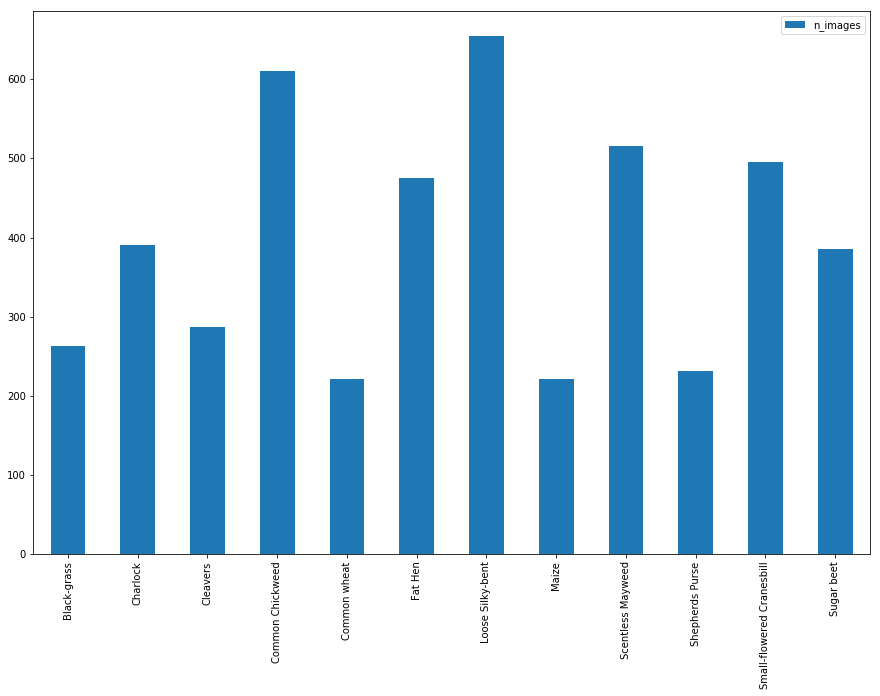

In [0]:
# Visvalisze the number of species in counts 
df.plot(kind="bar", figsize=(15,10))

In [0]:
import math # MATHEMATICAL OPERATIONS
import cv2 # IMAGE PROCESSING - OPENCV
from glob import glob # FILE OPERATIONS
import itertools
from tqdm import tqdm

In [0]:
#Training data
scale =70
path_to_images = '/content/dataset_ps/train/*/*.png'
images = glob(path_to_images)
trainingset = []
traininglabels = []
num = len(images)
count = 1
#READING IMAGES AND RESIZING THEM
for i in images:
    print(str(count)+'/'+str(num),end='\r')
    trainingset.append(cv2.resize(cv2.imread(i),(scale,scale)))
    traininglabels.append(i.split('/')[-2])
    count=count+1
trainingset = np.asarray(trainingset)
traininglabels = pd.DataFrame(traininglabels)

In [0]:
trainingset.shape

(4750, 70, 70, 3)

In [0]:
traininglabels.shape

(4750, 1)

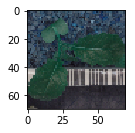

In [0]:
for i in trainingset:
     plt.subplot(2,3,1);plt.imshow(i) # ORIGINAL     

### Converting the Labels into numbers:
 

The labels are strings and these are hard to process. So we'll convert these labels into a binary classification.
  The classification can be represented by an array of 12 numbers which   will follow the condition:
     0 if the species is not detected.
     1 if the species is detected.
Example: If Blackgrass is detected, the array will be = [1,0,0,0,0,0,0,0,0,0,0,0]

In [0]:
from keras.utils import np_utils
from sklearn import preprocessing

labels = preprocessing.LabelEncoder()
labels.fit(traininglabels[0])
print('Classes'+str(labels.classes_))
encodedlabels = labels.transform(traininglabels[0])
clearalllabels = np_utils.to_categorical(encodedlabels)


Using TensorFlow backend.


Classes['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


In [0]:
# check it is correct
classes_1 = clearalllabels.shape[1]
print(str(classes_1))


12


In [0]:
clearalllabels.shape

(4750, 12)

In [0]:
#Split the data set 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [0]:
#30% percentage split
X_train, X_test, y_train, y_test = train_test_split(trainingset, clearalllabels, test_size = 0.3, random_state = 0)

In [0]:
####  convert to data type and re shape to 4 dimension for 2DConven network
X_train =X_train.reshape(-1,70,70,3).astype('float32')
X_test =X_test.reshape(-1,70,70,3).astype('float32')

In [0]:
# Normalize data
X_train_n = X_train/255
X_test_n = X_test/255

In [0]:
# KERAS AND SKLEARN MODULES
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger

In [0]:
seed = 7 
scale = 70
np.random.seed(seed)

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(scale, scale, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(classes_1, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 66, 66, 64)        4864      
_________________________________________________________________
batch_normalization_1 (Batch (None, 66, 66, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 31, 31, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0       

In [0]:
## Image Generator

train_datagen = ImageDataGenerator(
    shear_range = 0.2,
    rotation_range = 360,
    zoom_range = 0.3,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    horizontal_flip = True,
    vertical_flip = True
)

train_datagen.fit(X_train_n)

In [0]:
# SETTING UP CHECKPOINTS, CALLBACKS AND REDUCING LEARNING RATE
lrr = ReduceLROnPlateau(monitor='val_acc', 
                        patience=5, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.000001)

filepath= "/content/drive/My Drive/GLLAB/PlanetSeeding/weights.best_{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoints = ModelCheckpoint(filepath, monitor='val_acc', 
                              verbose=1, save_best_only=True, mode='max')
filepath="/content/drive/My Drive/GLLAB/PlanetSeeding/weights.last_auto4.hdf5"
checkpoints_full = ModelCheckpoint(filepath, monitor='val_acc', 
                                 verbose=1, save_best_only=False, mode='max')

callbacks_list = [checkpoints, lrr, checkpoints_full]

In [0]:
model.load_weights("/content/drive/My Drive/GLLAB/PlanetSeeding/weights.best_14-0.95.hdf5")

In [0]:
history = model.fit_generator(train_datagen.flow(X_train_n, y_train, batch_size=256), 
                    validation_data=(X_test_n, y_test),
                    steps_per_epoch=len(X_train_n) / 32, epochs=10, callbacks=callbacks_list)

Epoch 1/10
104/103 [==============================] - 58s 557ms/step - loss: 0.0962 - acc: 0.9687 - val_loss: 0.1505 - val_acc: 0.9530

Epoch 00001: val_acc did not improve from 0.95368

Epoch 00001: saving model to /content/drive/My Drive/GLLAB/PlanetSeeding/weights.last_auto4.hdf5
Epoch 2/10
104/103 [==============================] - 55s 528ms/step - loss: 0.0909 - acc: 0.9705 - val_loss: 0.1505 - val_acc: 0.9530

Epoch 00002: val_acc did not improve from 0.95368

Epoch 00002: saving model to /content/drive/My Drive/GLLAB/PlanetSeeding/weights.last_auto4.hdf5
Epoch 3/10
104/103 [==============================] - 55s 527ms/step - loss: 0.0923 - acc: 0.9706 - val_loss: 0.1507 - val_acc: 0.9530

Epoch 00003: val_acc did not improve from 0.95368

Epoch 00003: saving model to /content/drive/My Drive/GLLAB/PlanetSeeding/weights.last_auto4.hdf5
Epoch 4/10
104/103 [==============================] - 55s 530ms/step - loss: 0.0923 - acc: 0.9703 - val_loss: 0.1504 - val_acc: 0.9530

Epoch 00004:

In [0]:
path_to_test = '/content/dataset_ps/test/*.png'
pics = glob(path_to_test)

testimages = []
tests = []
count=1
num = len(pics)

for i in pics:
    print(str(count)+'/'+str(num),end='\r')
    tests.append(i.split('/')[-1])
    testimages.append(cv2.resize(cv2.imread(i),(scale,scale)))
    count = count + 1

testimages = np.asarray(testimages)

In [0]:
testimages.shape[0]

794

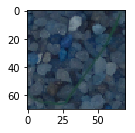

In [0]:
for i in testimages:
     plt.subplot(2,3,1);plt.imshow(i) # Test    

In [0]:
testimages_n = testimages/255

In [0]:
prediction = model.predict(testimages_n)

In [0]:
pred = np.argmax(prediction,axis=1)

In [0]:
predStr = labels.classes_[pred]
result = {'file':tests,'species':predStr}
result = pd.DataFrame(result)

In [0]:
result.head()

,file,species
0,41e07778c.png,Cleavers
1,88d8a4508.png,Maize
2,2b55a2da2.png,Charlock
3,f9ea23fb5.png,Fat Hen
4,73260a4ee.png,Fat Hen


In [0]:
#Saving the result in csv format to upload.
result.to_csv("/content/drive/My Drive/GLLAB/PlanetSeeding/Prediction.csv.csv",index=False)

In [0]:
#In Kaggle, I got score of 0.93198

In [0]:
## Try to change optimiser from Adam to SGD to check the results 
from keras.optimizers import SGD
mypotim = SGD(lr=1 * 1e-8, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=mypotim,metrics=['accuracy'])

In [0]:
history = model.fit_generator(train_datagen.flow(X_train_n, y_train, batch_size=256), 
                    validation_data=(X_test_n, y_test),
                    steps_per_epoch=len(X_train_n) / 32, epochs=10, callbacks=callbacks_list)

Epoch 1/10
104/103 [==============================] - 56s 536ms/step - loss: 0.0923 - acc: 0.9695 - val_loss: 0.1507 - val_acc: 0.9523

Epoch 00001: val_acc did not improve from 0.95368

Epoch 00001: saving model to /content/drive/My Drive/GLLAB/PlanetSeeding/weights.last_auto4.hdf5
Epoch 2/10
104/103 [==============================] - 53s 505ms/step - loss: 0.0950 - acc: 0.9683 - val_loss: 0.1504 - val_acc: 0.9530

Epoch 00002: val_acc did not improve from 0.95368

Epoch 00002: saving model to /content/drive/My Drive/GLLAB/PlanetSeeding/weights.last_auto4.hdf5
Epoch 3/10
104/103 [==============================] - 52s 499ms/step - loss: 0.0915 - acc: 0.9698 - val_loss: 0.1509 - val_acc: 0.9530

Epoch 00003: val_acc did not improve from 0.95368

Epoch 00003: saving model to /content/drive/My Drive/GLLAB/PlanetSeeding/weights.last_auto4.hdf5
Epoch 4/10
104/103 [==============================] - 51s 490ms/step - loss: 0.0949 - acc: 0.9697 - val_loss: 0.1508 - val_acc: 0.9530

Epoch 00004:

In [0]:
import pandas as pd
import numpy as np
import os
import imageio

from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Maximum
from keras.layers import ZeroPadding2D
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras import regularizers
from keras.layers import BatchNormalization
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from skimage.transform import resize as imresize
from tqdm import tqdm


In [0]:
#Create another model to check the perfomance 

# Dense layers set
def dense_set(inp_layer, n, activation, drop_rate=0.):
    dp = Dropout(drop_rate)(inp_layer)
    dns = Dense(n)(dp)
    bn = BatchNormalization(axis=-1)(dns)
    act = Activation(activation=activation)(bn)
    return act

# Conv. layers set
def conv_layer(feature_batch, feature_map, kernel_size=(3, 3),strides=(1,1), zp_flag=False):
    if zp_flag:
        zp = ZeroPadding2D((1,1))(feature_batch)
    else:
        zp = feature_batch
    conv = Conv2D(filters=feature_map, kernel_size=kernel_size, strides=strides)(zp)
    bn = BatchNormalization(axis=3)(conv)
    act = LeakyReLU(1/10)(bn)
    return act

# simple model 
def get_model():
    inp_img = Input(shape=(70, 70, 3))

    # 51
    conv1 = conv_layer(inp_img, 64, zp_flag=False)
    conv2 = conv_layer(conv1, 64, zp_flag=False)
    mp1 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(conv2)
    # 23
    conv3 = conv_layer(mp1, 128, zp_flag=False)
    conv4 = conv_layer(conv3, 128, zp_flag=False)
    mp2 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(conv4)
    # 9
    conv7 = conv_layer(mp2, 256, zp_flag=False)
    conv8 = conv_layer(conv7, 256, zp_flag=False)
    conv9 = conv_layer(conv8, 256, zp_flag=False)
    mp3 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(conv9)
    # 1
    # dense layers
    flt = Flatten()(mp3)
    ds1 = dense_set(flt, 128, activation='tanh')
    out = dense_set(ds1, 12, activation='softmax')

    model = Model(inputs=inp_img, outputs=out)     
   
    return model


In [0]:
model_2 = get_model()

In [0]:
mypotim = Adam(lr=2 * 1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
#mypotim = SGD(lr=1 * 1e-1, momentum=0.9, nesterov=True)
model_2.compile(loss='categorical_crossentropy',
                   optimizer=mypotim,
                   metrics=['accuracy'])
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 68, 68, 64)        1792      
_________________________________________________________________
batch_normalization_83 (Batc (None, 68, 68, 64)        256       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 68, 68, 64)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 66, 66, 64)        36928     
_________________________________________________________________
batch_normalization_84 (Batc (None, 66, 66, 64)        256       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 66, 66, 64)        0   

In [0]:
history = model_2.fit_generator(train_datagen.flow(X_train_n, y_train, batch_size=64), 
                    validation_data=(X_test_n, y_test),
                    steps_per_epoch=len(X_train_n) / 32, epochs=50, callbacks=callbacks_list)

Epoch 1/50
104/103 [==============================] - 19s 180ms/step - loss: 0.0724 - acc: 0.9796 - val_loss: 0.1259 - val_acc: 0.9649

Epoch 00001: val_acc did not improve from 0.96702

Epoch 00001: saving model to /content/drive/My Drive/GLLAB/PlanetSeeding/weights.last_auto4.hdf5
Epoch 2/50
104/103 [==============================] - 19s 178ms/step - loss: 0.0775 - acc: 0.9767 - val_loss: 0.1276 - val_acc: 0.9649

Epoch 00002: val_acc did not improve from 0.96702

Epoch 00002: saving model to /content/drive/My Drive/GLLAB/PlanetSeeding/weights.last_auto4.hdf5
Epoch 3/50
104/103 [==============================] - 19s 178ms/step - loss: 0.0775 - acc: 0.9770 - val_loss: 0.1260 - val_acc: 0.9642

Epoch 00003: val_acc did not improve from 0.96702

Epoch 00003: saving model to /content/drive/My Drive/GLLAB/PlanetSeeding/weights.last_auto4.hdf5
Epoch 4/50
104/103 [==============================] - 19s 179ms/step - loss: 0.0793 - acc: 0.9753 - val_loss: 0.1265 - val_acc: 0.9635

Epoch 00004:

In [0]:
mypotim = SGD(lr=1 * 1e-8, momentum=0.9, nesterov=True)
model_2.compile(loss='categorical_crossentropy',
                   optimizer=mypotim,
                   metrics=['accuracy'])


In [0]:
history = model_2.fit_generator(train_datagen.flow(X_train_n, y_train, batch_size=256), 
                    validation_data=(X_test_n, y_test),
                    steps_per_epoch=len(X_train_n) / 32, epochs=5, callbacks=callbacks_list)

Epoch 1/5
104/103 [==============================] - 61s 589ms/step - loss: 0.0542 - acc: 0.9848 - val_loss: 0.1261 - val_acc: 0.9649

Epoch 00001: val_acc did not improve from 0.96702

Epoch 00001: saving model to /content/drive/My Drive/GLLAB/PlanetSeeding/weights.last_auto4.hdf5
Epoch 2/5
104/103 [==============================] - 60s 581ms/step - loss: 0.0542 - acc: 0.9845 - val_loss: 0.1266 - val_acc: 0.9649

Epoch 00002: val_acc did not improve from 0.96702

Epoch 00002: saving model to /content/drive/My Drive/GLLAB/PlanetSeeding/weights.last_auto4.hdf5
Epoch 3/5
104/103 [==============================] - 60s 576ms/step - loss: 0.0533 - acc: 0.9845 - val_loss: 0.1264 - val_acc: 0.9649

Epoch 00003: val_acc did not improve from 0.96702

Epoch 00003: saving model to /content/drive/My Drive/GLLAB/PlanetSeeding/weights.last_auto4.hdf5
Epoch 4/5
104/103 [==============================] - 59s 569ms/step - loss: 0.0544 - acc: 0.9849 - val_loss: 0.1267 - val_acc: 0.9649

Epoch 00004: val

In [0]:
prediction_2 = model_2.predict(testimages_n)

In [0]:
pred_2 = np.argmax(prediction_2,axis=1)

In [0]:
predStr = labels.classes_[pred]
result = {'file':tests,'species':predStr}
result = pd.DataFrame(result)

In [0]:
#Saving the result in csv format to upload.
result.to_csv("/content/drive/My Drive/GLLAB/PlanetSeeding/Result_model_2.csv",index=False)

##In Kaggle, I got the score of 0.92947

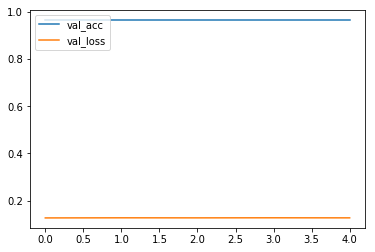

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_acc'])
plt.plot(history.history['val_loss'])
plt.legend(['val_acc', 'val_loss'], loc='upper left')

plt.show()

In [0]:
print("Final train accuracy", history.history["acc"][-1])
print("Final test accuracy", history.history["val_acc"][-1])

Final train accuracy 0.9848120314443022
Final test accuracy 0.9649122791959528


In [0]:
#In Kaggle, I got the score of 0.92947